## CSE251B PA1

In [1]:
#Basic setups 
import numpy as np
from skimage import io
%matplotlib inline
import matplotlib.pyplot as plt

### Part 1: Load and preprocess the data

In [2]:
from dataloader import load_data
from PCA import PCA

In [3]:
#Load and preprocess the data
#We change the load_data function by deleting the value assigned to datatype in the definition
aligned_data,cnt = load_data("./aligned/")

Car types: ['Convertible', 'Minivan', 'Pickup', 'Sedan'] 

Convertible: 149 # of images
Minivan: 148 # of images
Pickup: 150 # of images
Sedan: 150 # of images


### Part 2: Cross Validation Procedure

In [4]:
from random import shuffle
import math
def kFold(K,data):
    """This function is used to implement k-fold cross-validation"""
    #Shuffle the dataset to get more accurate performance
    index = np.arange(0,len(data))
    shuffled_idx = np.random.shuffle(index)
    shuffled_data = data[shuffled_idx]
    
    #Split the data into training, testing and handout set
    size = len(data)
    set_size = math.floor(size/K)
    index_train = int(set_size*(K-2))
    index_test = int(set_size*(K-1))

    
    training_set = shuffled_data[:index_train]
    testing_set = shuffled_data[index_train:index_test]
    val_set = shuffled_data[index_test:]
    return training_set,testing_set,val_set

In [5]:
def img_flatten(img):
    """This function is used to convert 2-D images to 1-D vectors"""
    flatten_img = []
    for i in range(len(img)):
        flatten_img.append(img[i].flatten())
    return np.array(flatten_img)

In [21]:
def plot_top_PCs(eigenvectors,n):
    """This function is used plot top PCs"""
    imgs = []
    plt.figure()
    for i in range(n):
        eigen = eigenvectors[:,i]
        image = np.reshape(eigen,(200,300))
        imgs.append(image)
        plt.subplot(2,n/2,i+1)
        plt.imshow(imgs[i])

In [97]:
#Train Process
#Load data 
minivan = aligned_data.get('Minivan')
convertible = aligned_data.get('Convertible')
pickup = aligned_data.get('Pickup')
sedan = aligned_data.get('Sedan')

minivan_flatten = img_flatten(minivan)
convertible_flatten = img_flatten(convertible)
pickup_flatten = img_flatten(pickup)
sedan_flatten = img_flatten(sedan)

#Perform K-Fold cross validation
num_fold = 10
trainM,testM,valM = kFold(num_fold,minivan_flatten)
trainC,testC,valC = kFold(num_fold,convertible_flatten)
trainP,testP,valP = kFold(num_fold,pickup_flatten)
trainS,testS,valS = kFold(num_fold,sedan_flatten)

#Perform PCA to find top PCs
num_PC = 4
#Minivan
projectedM, mean_imageM, top_sqrt_eigen_valuesM, top_eigen_vectorsM = PCA(trainM[0],num_PC)
#Convertible
projectedC, mean_imageC, top_sqrt_eigen_valuesC, top_eigen_vectorsC = PCA(trainC[0],num_PC)
#Pickup
projectedP, mean_imageP, top_sqrt_eigen_valuesP, top_eigen_vectorsP = PCA(trainP[0],num_PC)
#Sedan
projectedS, mean_imageS, top_sqrt_eigen_valuesS, top_eigen_vectorsS = PCA(trainS[0],num_PC)

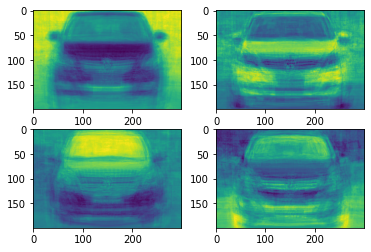

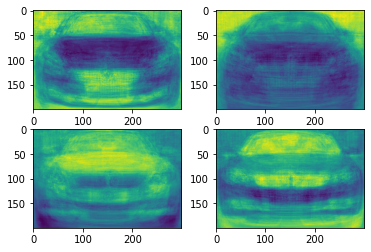

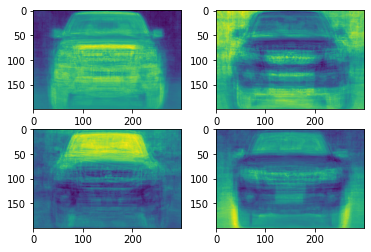

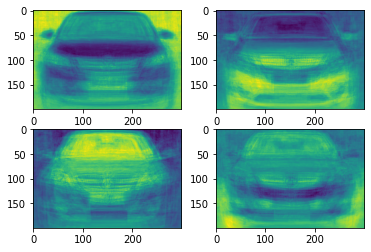

In [95]:
#Plot top PCs
plot_top_PCs(top_eigen_vectorsM,4)
plot_top_PCs(top_eigen_vectorsC,4)
plot_top_PCs(top_eigen_vectorsP,4)
plot_top_PCs(top_eigen_vectorsS,4)

### Part 6: Softmax Regression via Gradient Descent

In [35]:
class LogisticReressionClassifier:
    def __init__(self, max_iter=200, learning_rate=0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def data_matrix(self, X):
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d])
        return data_mat

    def fit(self, X, y):
        # label = np.mat(y)
        data_mat = self.data_matrix(X)  # m*n
        print ('data_mat', data_mat)
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)
        print('weights init val:\n', self.weights)
        
        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                # -(h(x)-y)x
                result = self.sigmoid(np.dot(data_mat[i], self.weights))
                error = y[i] - result
                self.weights += self.learning_rate * error * np.transpose(
                    [data_mat[i]])#[1,2,3]
                print('weights update val:\n', self.weights)
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(
            self.learning_rate, self.max_iter))

    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)

In [89]:
X_train = np.concatenate((projectedM, projectedC), axis=0)
y_train = np.concatenate((np.zeros(projectedM.shape[0]), np.ones(projectedC.shape[0])), axis=0)
X_test


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [91]:
from math import exp
lr_clf = LogisticReressionClassifier(max_iter=10)
lr_clf.fit(X_train, y_train)

data_mat [[1.0, 0.16247758041741955, -0.05284533214307044, 0.0029326207966871086, -0.0395764612052331], [1.0, -0.1609922430069605, -0.08349636863281305, 0.14024061919981087, 0.062439850907399126], [1.0, -0.0367565405226571, -0.04124055346282079, -0.083321325697803, 0.02539773018770242], [1.0, -0.07256608587371002, -0.09069425287872321, 0.07166167641939497, -0.08460281100934565], [1.0, 0.15914626131396, -0.004546353719273729, 0.0008073543900879479, -0.0624018263882106], [1.0, -0.07093126088396648, 0.03444110175468948, -0.1057418582972829, -0.0013835669157454618], [1.0, 0.04183861340925034, 0.15939072150189804, 0.11907238527077768, 0.017173984293985953], [1.0, -0.012765277469785926, 0.04853904626556251, -0.07141663489873401, -0.018866346849014927], [1.0, -0.04127152007394534, 0.0702763385402573, 0.03371777261852343, -0.05896299253777015], [1.0, 0.15256147511765805, 0.07051641449009992, 0.019258141303138066, 0.15941254831704207], [1.0, 0.11431981311282527, -0.06605957050239522, 0.01968742

In [92]:
lr_clf.score(X_test, y_test)

NameError: name 'X_test' is not defined

IndexError: index 1 is out of bounds for axis 0 with size 0